In [21]:
import matplotlib.pyplot as plt

size = 16

plt.rcParams.update({
    "font.family": "Times New Roman",  # or "Arial", "Times New Roman", etc.
    "font.size": size,
    "axes.titlesize": size,
    "axes.labelsize": size,
    "xtick.labelsize": size,
    "ytick.labelsize": size,
    "legend.fontsize": size
})

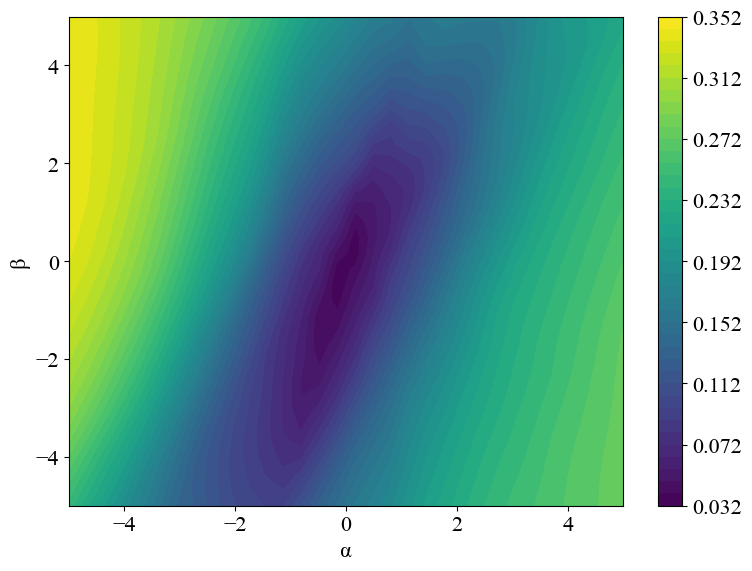

In [42]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("../pretrained_models/loss_landscape_data.npz")
losses = data["losses"]
alphas = data["alphas"]
betas = data["betas"]

X, Y = np.meshgrid(alphas, betas)

plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, losses, levels=50, cmap="viridis")
plt.colorbar(cp)
# plt.title("Loss Landscape Contours (from saved data)")
plt.xlabel("α")
plt.ylabel("β")
plt.tight_layout()
plt.show()


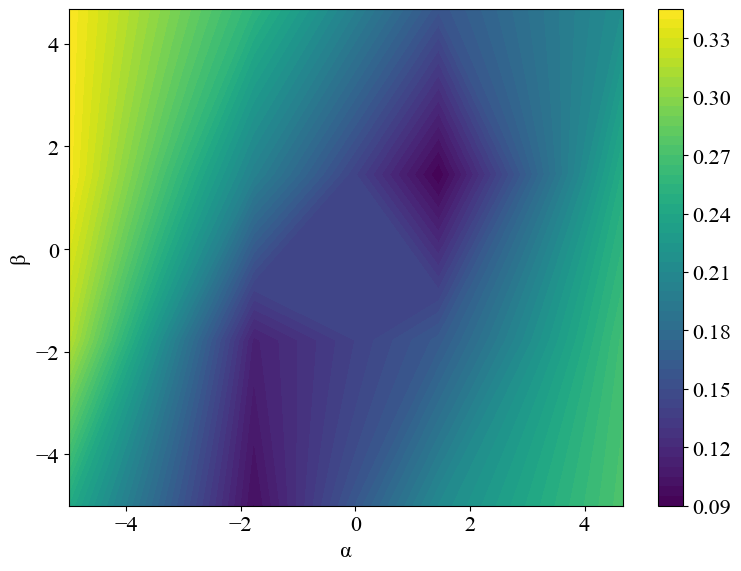

In [43]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("../pretrained_models/loss_landscape_data.npz")
losses = data["losses"]
alphas = data["alphas"]
betas = data["betas"]

# Downsample factor (e.g., 5 means 1/5th points)
factor = 10

losses_ds = losses[::factor, ::factor]
alphas_ds = alphas[::factor]
betas_ds = betas[::factor]

X, Y = np.meshgrid(alphas_ds, betas_ds)

plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, losses_ds, levels=50, cmap="viridis")
plt.colorbar(cp)
plt.xlabel("α")
plt.ylabel("β")
plt.tight_layout()
plt.show()


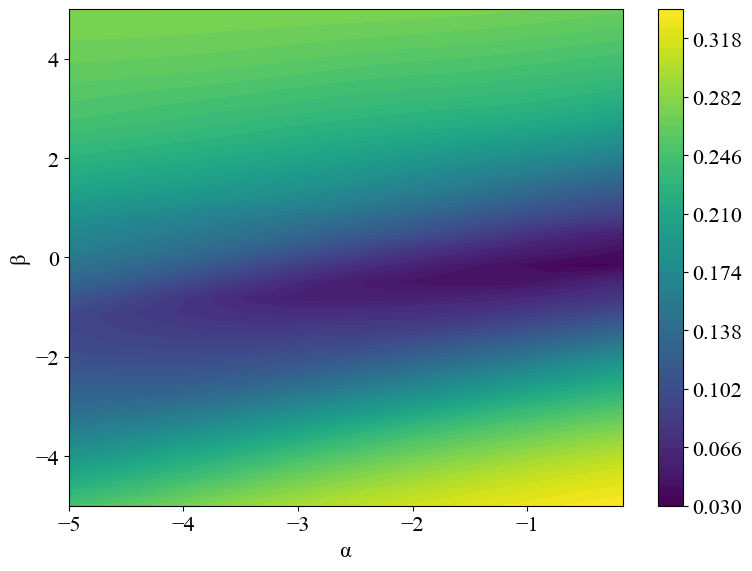

In [48]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("../pretrained_models/loss_landscape_data.npz")
losses = data["losses"]
alphas = data["alphas"]
betas = data["betas"]

# Pick all alphas ≤ 0
alpha_inds = np.where(alphas <= 0)[0]

# Keep full beta range (or you can filter similarly)
beta_inds = np.arange(len(betas))  # all betas

losses_zoom = losses[np.ix_(alpha_inds, beta_inds)]
alphas_zoom = alphas[alpha_inds]
betas_zoom = betas[beta_inds]

X, Y = np.meshgrid(alphas_zoom, betas_zoom, indexing='ij')

plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, losses_zoom, levels=50, cmap="viridis")
plt.colorbar(cp)
plt.xlabel("α")
plt.ylabel("β")
plt.tight_layout()
plt.show()

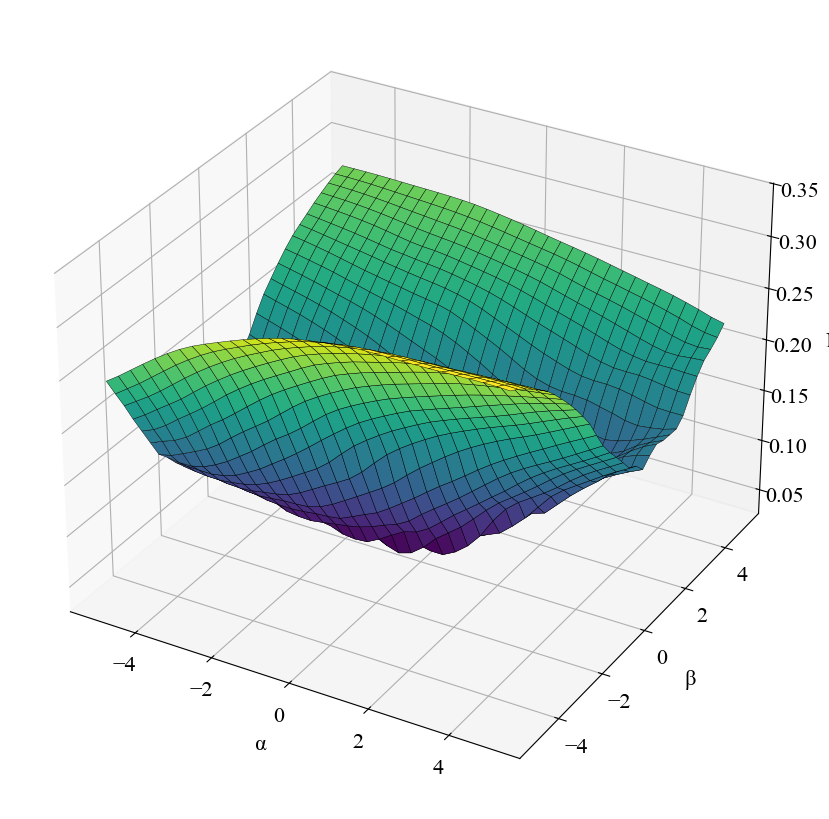

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting
# your 3D plot code here

data = np.load("../pretrained_models/loss_landscape_data.npz")
losses = data["losses"]
alphas = data["alphas"]
betas = data["betas"]

X, Y = np.meshgrid(alphas, betas, indexing='ij')  # keep 'ij' for shape consistency

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, losses, cmap="viridis", edgecolor='k', linewidth=0.3, antialiased=True)

ax.set_zlabel("Loss", labelpad=15)
ax.set_xlabel("α", labelpad=10)
ax.set_ylabel("β", labelpad=10)

# ax.set_title("Loss Landscape 3D Surface")

#fig.colorbar(surf, shrink=0.5, aspect=10)
#plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.subplots_adjust(left=0.0, right=1, bottom=0.1, top=0.9)
#plt.tight_layout()
plt.show() 